In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preplacementdata.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [6]:
#label encoding another way using for loop
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['gender','workex','status']
for i in col:
    dataset[i] = le.fit_transform(dataset[i]).astype(int)


In [8]:
#One-Hot Encoding for non-binary categorical variables (e.g., ssc_b, hsc_b, specialisation, degree_t)

dataset = pd.get_dummies(dataset, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'], drop_first=True)
dataset=dataset.astype(int)

In [9]:
dataset.cov()
#ValueError: could not convert string to float: 'M' ------ to fix this we need label encoding 
#ValueError: could not convert string to float: 'Others'  ------ to fix this, use one hot encoding 

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,workex,status,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
sl_no,3870.000000,-52.841121,-57.252336,-40.518692,53.116822,7.785047,2.449065e+04,2.214953,1.752336,-0.775701,0.845794,3.556075,-0.761682,0.560748,0.915888,0.252336,1.443925
ssc_p,-52.841121,116.407651,60.209107,42.585329,37.153010,24.363769,8.984511e+05,-0.349011,0.906477,3.055944,0.608715,0.343469,-0.550554,1.016149,-0.157183,1.066442,-0.916540
hsc_p,-57.252336,60.209107,117.980352,34.466551,35.051293,22.387785,7.575911e+05,-0.112867,0.722169,2.477048,-0.749250,-0.110237,1.396849,-1.213910,-0.309107,-0.264138,-1.287655
degree_p,-40.518692,42.585329,34.466551,54.034688,21.823408,17.257596,4.610256e+05,-0.615040,0.421039,1.631797,0.140448,0.244469,-0.095001,0.345751,-0.288133,0.400609,-0.789611
etest_p,53.116822,37.153010,35.051293,21.823408,176.247120,17.163225,3.809930e+05,0.538470,0.363182,0.782439,-0.129428,0.238535,-0.146599,0.365029,0.024560,0.067159,-1.564443
mba_p,7.785047,24.363769,22.387785,17.257596,17.163225,34.225038,1.289547e+05,-0.842339,0.466507,0.208715,0.234493,0.252467,-0.162725,0.156401,-0.045077,0.339361,-0.320908
salary,24490.654206,898451.054119,757591.132363,461025.603130,380993.044990,128954.705499,2.395714e+10,10613.910020,21986.111715,62210.541187,2675.092371,873.810041,1180.547707,2061.160617,-3662.269072,5493.284069,-21246.359487
gender,2.214953,-0.349011,-0.112867,-0.615040,0.538470,-0.842339,1.061391e+04,0.229602,0.019431,0.020170,0.004651,0.015453,-0.000261,0.010128,-0.009867,0.018018,-0.025321
workex,1.752336,0.906477,0.722169,0.421039,0.363182,0.466507,2.198611e+04,0.019431,0.226777,0.061030,-0.009694,0.008933,-0.013519,0.007846,0.001000,0.021930,-0.045316
status,-0.775701,3.055944,2.477048,1.631797,0.782439,0.208715,6.221054e+04,0.020170,0.061030,0.215518,0.008650,0.003847,0.005673,0.001674,-0.012019,0.001804,-0.057922


In [10]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,workex,status,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
sl_no,1.000000,-0.078727,-0.084729,-0.088606,0.064315,0.021391,0.002543,0.074306,0.059151,-0.026859,0.027214,0.116887,-0.024463,0.018201,0.066666,0.009069,0.046630
ssc_p,-0.078727,1.000000,0.513767,0.536949,0.259383,0.385995,0.538005,-0.067509,0.176428,0.610116,0.112928,0.065095,-0.101952,0.190178,-0.065968,0.220996,-0.170661
hsc_p,-0.084729,0.513767,1.000000,0.431675,0.243074,0.352318,0.450622,-0.021686,0.139616,0.491233,-0.138071,-0.020753,0.256940,-0.225671,-0.128860,-0.054371,-0.238160
degree_p,-0.088606,0.536949,0.431675,1.000000,0.223628,0.401303,0.405202,-0.174614,0.120278,0.478176,0.038244,0.068004,-0.025821,0.094978,-0.177489,0.121849,-0.215800
etest_p,0.064315,0.259383,0.243074,0.223628,1.000000,0.220987,0.185412,0.084647,0.057447,0.126954,-0.019514,0.036740,-0.022063,0.055522,0.008377,0.011311,-0.236740
mba_p,0.021391,0.385995,0.352318,0.401303,0.220987,1.000000,0.142412,-0.300488,0.167451,0.076849,0.080230,0.088244,-0.055574,0.053984,-0.034890,0.129696,-0.110200
salary,0.002543,0.538005,0.450622,0.405202,0.185412,0.142412,1.000000,0.143110,0.298285,0.865774,0.034594,0.011544,0.015239,0.026890,-0.107139,0.079351,-0.275766
gender,0.074306,-0.067509,-0.021686,-0.174614,0.084647,-0.300488,0.143110,1.000000,0.085153,0.090670,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,-0.106160
workex,0.059151,0.176428,0.139616,0.120278,0.057447,0.167451,0.298285,0.085153,1.000000,0.276060,-0.040744,0.038357,-0.056719,0.033270,0.009507,0.102962,-0.191174
status,-0.026859,0.610116,0.491233,0.478176,0.126954,0.076849,0.865774,0.090670,0.276060,1.000000,0.037297,0.016945,0.024414,0.007279,-0.117232,0.008688,-0.250655


In [11]:
dataset.drop('sl_no',inplace=True,axis=1)

In [12]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,workex,status,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,67,91,58,55,58,270000,1,0,1,1,1,1,0,0,1,1
1,79,78,77,86,66,200000,1,1,1,0,1,0,1,0,1,0
2,65,68,64,75,57,250000,1,0,1,0,0,0,0,0,0,0
3,56,52,52,66,59,0,1,0,0,0,0,0,1,0,1,1
4,85,73,73,96,55,425000,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80,82,77,91,74,400000,1,0,1,1,1,1,0,0,0,0
211,58,60,72,74,53,275000,1,0,1,1,1,0,1,0,1,0
212,67,67,73,59,69,295000,1,1,1,1,1,1,0,0,0,0
213,74,66,58,70,60,204000,0,0,1,1,1,1,0,0,0,1


In [13]:
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings("ignore")

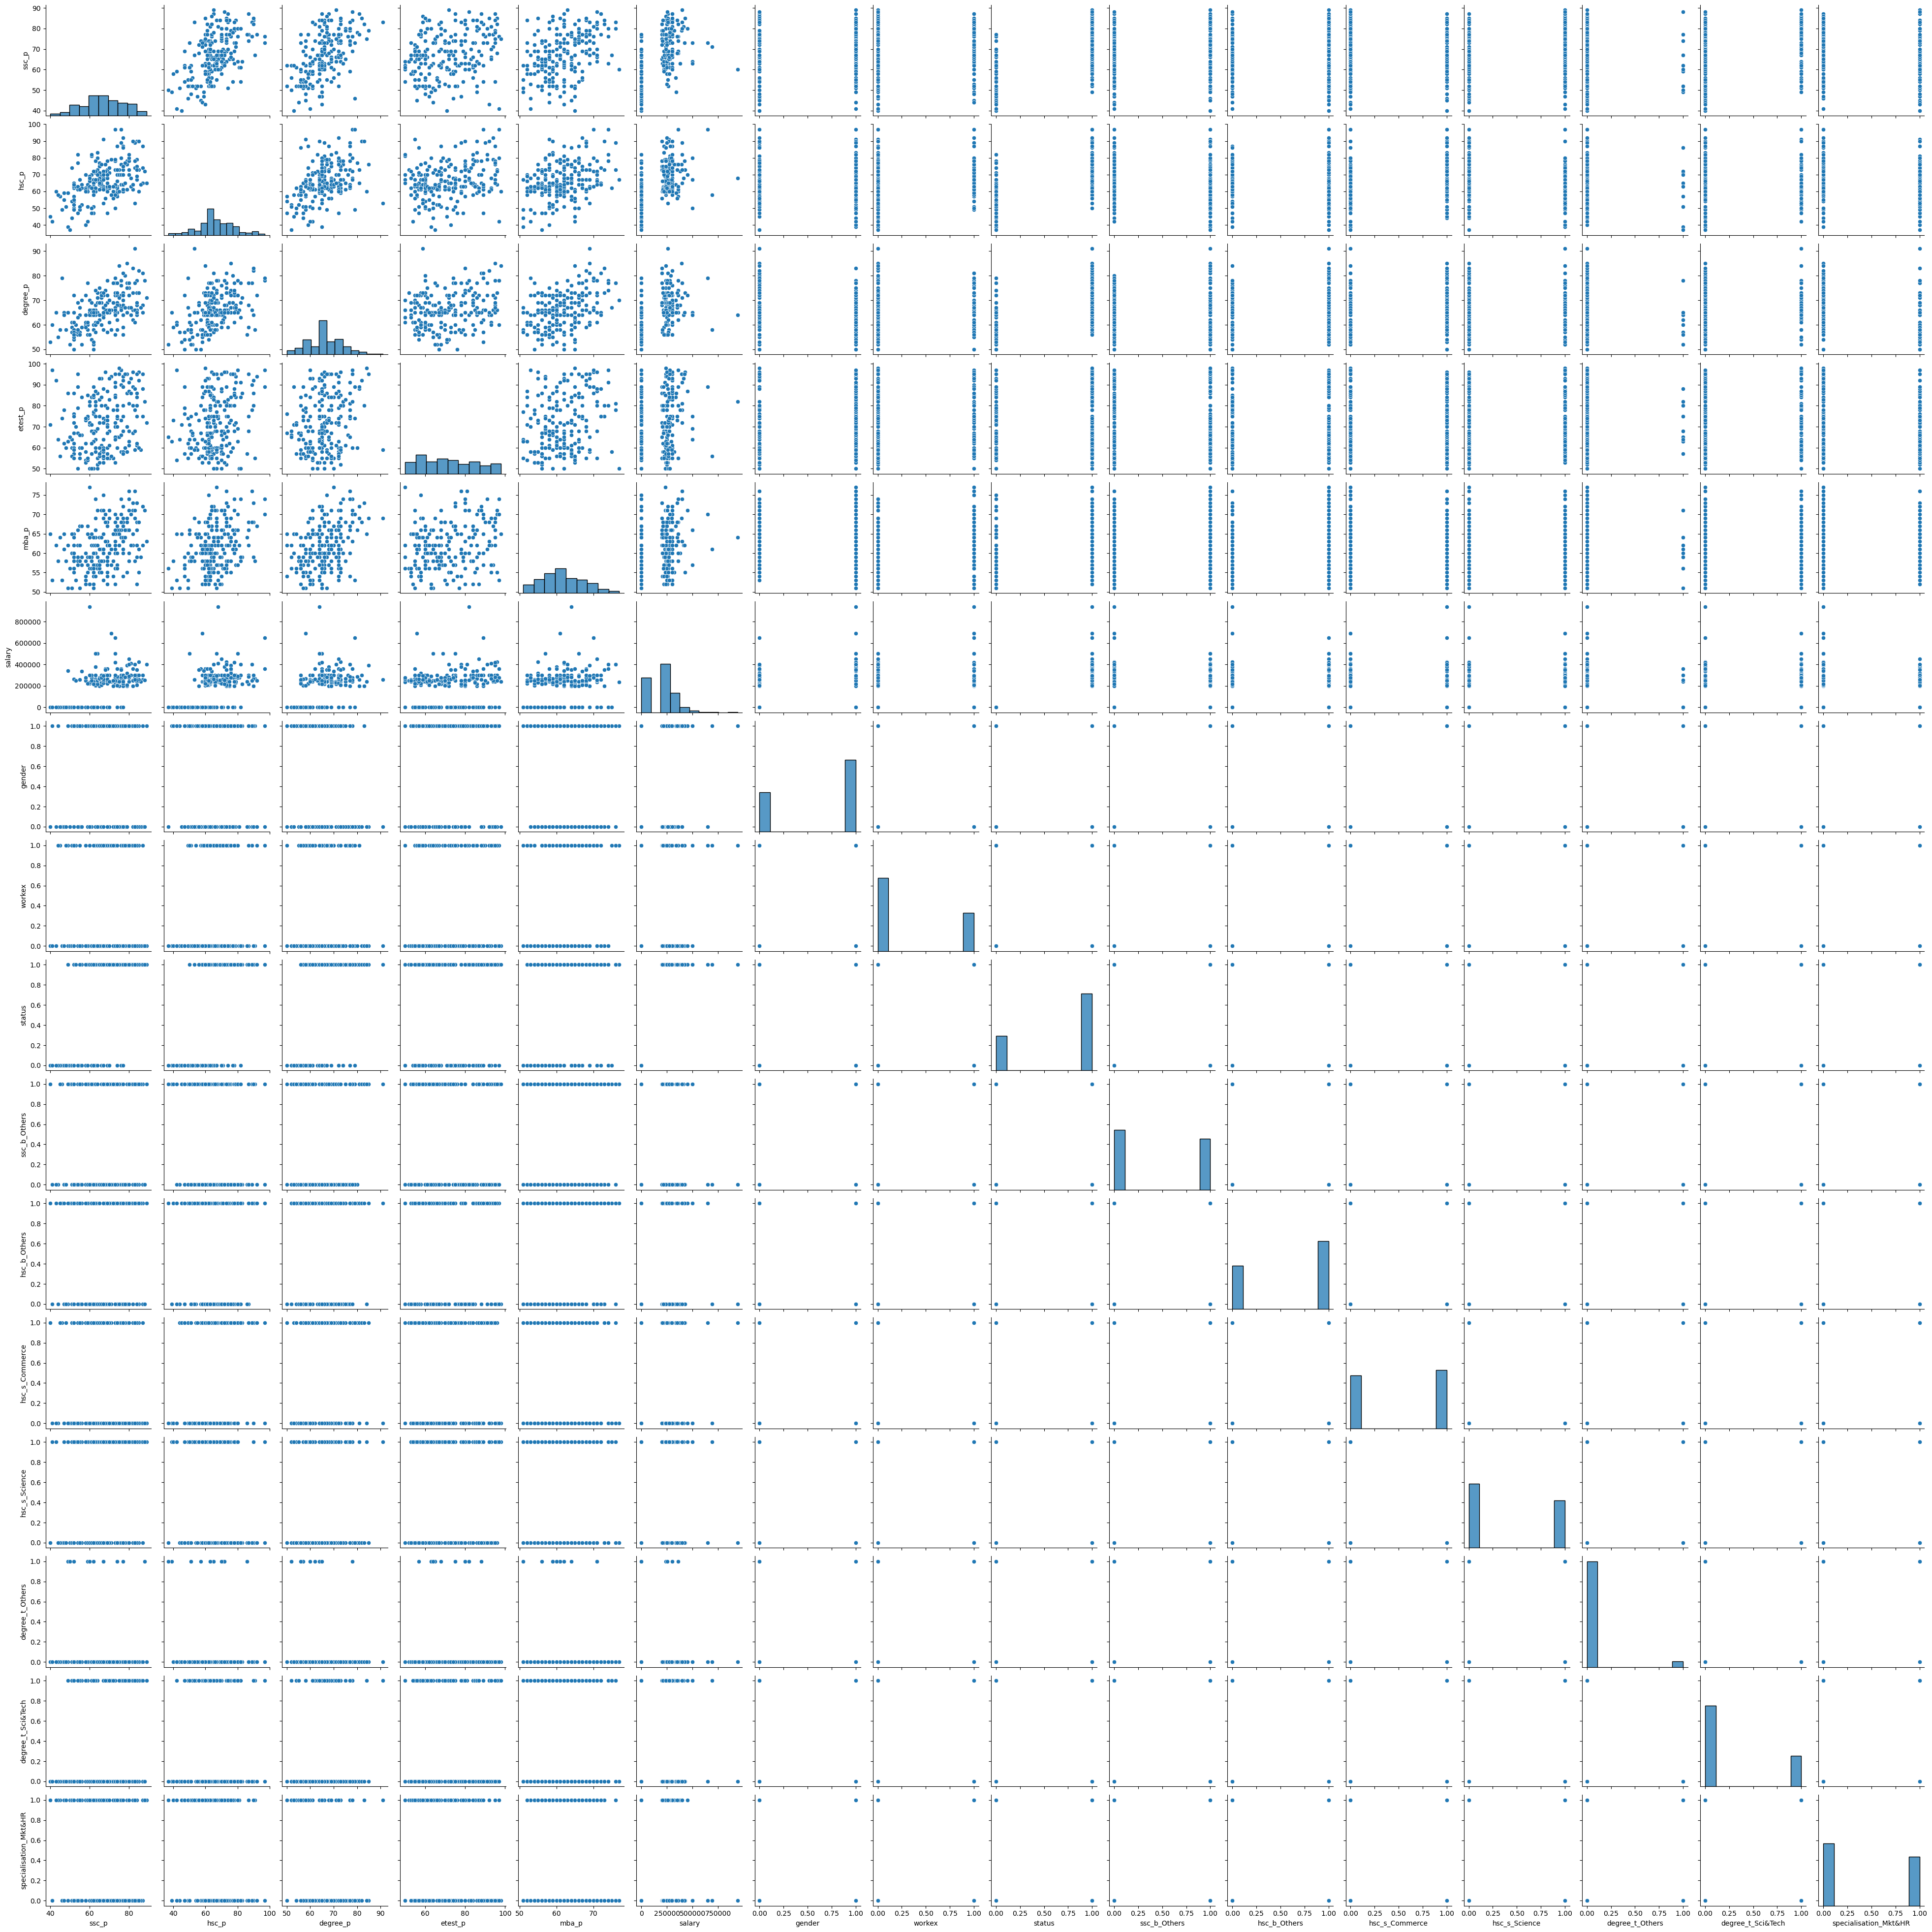

In [17]:
sns.pairplot(dataset)

In [ ]:
#how to show above pairplt in visible  or   remove onhotencoder to show actual dataset column s only?
#ANS?

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
#vif used for the numbers and not categories data.

In [19]:
calc_vif(dataset[["etest_p","salary"]])

,variables,VIF
0,etest_p,2.743051
1,salary,0.000109


#### Independant Sample- Unpaired T Test
Diferrent Group(Male, Female) but same contion(salary)

In [20]:
dataset[dataset['gender']=='F']["salary"]

Series([], Name: salary, dtype: int32)

In [21]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male, female)

TtestResult(statistic=nan, pvalue=nan, df=nan)

#### Dependant Sample-Paired T_Test
Same Group(Male) but Different Condition(ssc_p,hsc_p)


In [22]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


TtestResult(statistic=nan, pvalue=nan, df=nan)

In [ ]:
# Hypothesis Testing

In [ ]:
#Statement: Test whether SSC_p of male and HSC_P of Male is Same?

In [ ]:
#Null hypothesis=There is no similarity between 10th pass mark of male  and 12th pass mark of male

In [23]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)
#ttest_rel is a function in Python's scipy.stats module that performs a paired sample t-test (also called a dependent t-test). 
#It is used to compare the means of two related groups to see if there is a statistically significant difference between them.
#same group with different condition---paired t test

TtestResult(statistic=nan, pvalue=nan, df=nan)

# Reject Null hypothesis p<0.05
# Accept Null Hypothesi and Reject Alternate hypothsis

# ANAVO : Analysis of Variance

In [24]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])


F_onewayResult(statistic=0.6462575755474923, pvalue=0.5243436945786987)